# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
city_count = len(cities)
city_count

614

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [6]:
# # Save config information

city = "Chicago"
units = 'Imperial'

# # Build query URL just to test it out...I printed it then deleted the print line


url = "http://api.openweathermap.org/data/2.5/weather?"
query_url = f"{url}appid={weather_api_key}&units={units}&q={city}"


print(query_url)


http://api.openweathermap.org/data/2.5/weather?appid=9470a783aafe2a0f9f0a5c17de8cdbbe&units=Imperial&q=Chicago


In [3]:
city_results = []
lats = []
lons = []
max_temps = []
humiditys = []
cloud_pcts = []
wind_speeds = []
countries = []
dates = []

In [7]:
# # TEST CELL
# query_url = f"{url}appid={weather_api_key}&units={units}&q="
# cities_test = ["Chicago","London","StrawnygiJoe","Rockford","Sukkur","Sydney","Jakarta","Johannesburg","Lima"]
# city_count_test=len(cities_test)

# for x in range(city_count_test):    #city in cities:
#     time.sleep(1)
#     weather_response = requests.get(query_url+str(cities_test[x])).json()
#     print(f"Processing record {x} of {city_count_test} | {cities_test[x]}")
#     # need to use exception handling if city not found
#     try:
#         city_results.append(weather_response['name'])
#         lats.append(weather_response['coord']['lat']) 
#         lons.append(weather_response['coord']['lon']) 
#         max_temps.append(weather_response['main']['temp_max']) 
#         humiditys.append(weather_response['main']['humidity'])
#         cloud_pcts.append(weather_response['clouds']['all'])
#         wind_speeds.append(weather_response['wind']['speed'])
#         countries.append(weather_response['sys']['country'])
#         dates.append(weather_response['dt'])
#     except KeyError:
#         print(f"    The city of {cities_test[x]} not found, dummy.  Skipping....")
#         pass
# print("\n-----------------------------\nData Retrieval Complete\n-----------------------------\n")

Processing record 0 of 9 | Chicago
Processing record 1 of 9 | London
Processing record 2 of 9 | StrawnygiJoe
    The city of StrawnygiJoe not found, dummy.  Skipping....
Processing record 3 of 9 | Rockford
Processing record 4 of 9 | Sukkur
Processing record 5 of 9 | Sydney
Processing record 6 of 9 | Jakarta
Processing record 7 of 9 | Johannesburg
Processing record 8 of 9 | Lima

-----------------------------
Data Retrieval Complete
-----------------------------



In [9]:
# REAL CELL
units = 'Imperial'
query_url = f"{url}appid={weather_api_key}&units={units}&q="

for x in range(city_count):    #city in cities:
    time.sleep(1)
    weather_response = requests.get(query_url+str(cities[x])).json()
    print(f"Processing record {x} of {city_count} | {cities[x]}")
    # need to use exception handling if city not found
    try:
        city_results.append(weather_response['name'])
        lats.append(weather_response['coord']['lat']) 
        lons.append(weather_response['coord']['lon']) 
        max_temps.append(weather_response['main']['temp_max']) 
        humiditys.append(weather_response['main']['humidity'])
        cloud_pcts.append(weather_response['clouds']['all'])
        wind_speeds.append(weather_response['wind']['speed'])
        countries.append(weather_response['sys']['country'])
        dates.append(weather_response['dt'])
    except KeyError:
        print(f"    The city of {cities[x]} not found, dummy.  Skipping....")
        pass
print("\n-----------------------------\nData Retrieval Complete\n-----------------------------\n")

Processing record 0 of 614 | hilo
Processing record 1 of 614 | tilichiki
Processing record 2 of 614 | narsimhapur
Processing record 3 of 614 | cilegon
Processing record 4 of 614 | hermanus
Processing record 5 of 614 | yellowknife
Processing record 6 of 614 | vaini
Processing record 7 of 614 | torbay
Processing record 8 of 614 | saldanha
Processing record 9 of 614 | piacabucu
Processing record 10 of 614 | los llanos de aridane
Processing record 11 of 614 | port hardy
Processing record 12 of 614 | rikitea
Processing record 13 of 614 | butaritari
Processing record 14 of 614 | nanga eboko
Processing record 15 of 614 | sitka
Processing record 16 of 614 | barrow
Processing record 17 of 614 | khatanga
Processing record 18 of 614 | pitimbu
Processing record 19 of 614 | ushuaia
Processing record 20 of 614 | hobart
Processing record 21 of 614 | faanui
Processing record 22 of 614 | punta arenas
Processing record 23 of 614 | novyy urgal
Processing record 24 of 614 | shimoda
Processing record 25 of

Processing record 181 of 614 | marcona
    The city of marcona not found, dummy.  Skipping....
Processing record 182 of 614 | bluff
Processing record 183 of 614 | riverton
Processing record 184 of 614 | paita
Processing record 185 of 614 | bethel
Processing record 186 of 614 | mahebourg
Processing record 187 of 614 | andselv
    The city of andselv not found, dummy.  Skipping....
Processing record 188 of 614 | santiago del estero
Processing record 189 of 614 | gorontalo
Processing record 190 of 614 | hun
Processing record 191 of 614 | grivenskaya
Processing record 192 of 614 | grootfontein
Processing record 193 of 614 | saint-francois
Processing record 194 of 614 | port elizabeth
Processing record 195 of 614 | touros
Processing record 196 of 614 | kargil
Processing record 197 of 614 | port blair
Processing record 198 of 614 | barbar
    The city of barbar not found, dummy.  Skipping....
Processing record 199 of 614 | vardo
Processing record 200 of 614 | alimanguan
    The city of alima

Processing record 355 of 614 | bagotville
Processing record 356 of 614 | tongliao
Processing record 357 of 614 | hostotipaquillo
Processing record 358 of 614 | hambantota
Processing record 359 of 614 | iskateley
Processing record 360 of 614 | ngukurr
    The city of ngukurr not found, dummy.  Skipping....
Processing record 361 of 614 | motala
Processing record 362 of 614 | quelimane
Processing record 363 of 614 | zyryanka
Processing record 364 of 614 | fredericton
Processing record 365 of 614 | motygino
Processing record 366 of 614 | honiara
Processing record 367 of 614 | the valley
Processing record 368 of 614 | manama
Processing record 369 of 614 | okhotsk
Processing record 370 of 614 | qaanaaq
Processing record 371 of 614 | nanortalik
Processing record 372 of 614 | acapetahua
Processing record 373 of 614 | teguise
Processing record 374 of 614 | kailua
Processing record 375 of 614 | iroquois falls
Processing record 376 of 614 | boffa
Processing record 377 of 614 | zhigansk
Processing

Processing record 543 of 614 | herouville-saint-clair
Processing record 544 of 614 | terra santa
Processing record 545 of 614 | gryazovets
Processing record 546 of 614 | tarudant
    The city of tarudant not found, dummy.  Skipping....
Processing record 547 of 614 | anadyr
Processing record 548 of 614 | risor
Processing record 549 of 614 | noumea
Processing record 550 of 614 | jinsha
Processing record 551 of 614 | kamenskoye
    The city of kamenskoye not found, dummy.  Skipping....
Processing record 552 of 614 | punta de piedra
Processing record 553 of 614 | qiongshan
Processing record 554 of 614 | karaul
    The city of karaul not found, dummy.  Skipping....
Processing record 555 of 614 | belyy yar
Processing record 556 of 614 | kalabo
Processing record 557 of 614 | praia da vitoria
Processing record 558 of 614 | bengkulu
Processing record 559 of 614 | banyo
Processing record 560 of 614 | abu kamal
Processing record 561 of 614 | presidencia roque saenz pena
Processing record 562 of 6

In [10]:
humiditys

[67,
 91,
 57,
 73,
 53,
 85,
 29,
 75,
 73,
 64,
 70,
 79,
 79,
 100,
 83,
 85,
 78,
 78,
 86,
 93,
 81,
 70,
 100,
 71,
 80,
 97,
 78,
 81,
 57,
 70,
 76,
 97,
 85,
 69,
 80,
 97,
 79,
 73,
 64,
 70,
 79,
 79,
 100,
 83,
 85,
 78,
 78,
 86,
 93,
 81,
 70,
 100,
 71,
 80,
 97,
 78,
 81,
 57,
 70,
 76,
 97,
 85,
 69,
 80,
 97,
 79,
 93,
 80,
 66,
 99,
 86,
 86,
 85,
 35,
 66,
 87,
 97,
 57,
 94,
 73,
 93,
 89,
 83,
 52,
 50,
 61,
 91,
 81,
 59,
 76,
 84,
 69,
 97,
 9,
 91,
 62,
 46,
 80,
 74,
 79,
 52,
 100,
 26,
 77,
 68,
 71,
 96,
 26,
 82,
 11,
 74,
 89,
 55,
 73,
 79,
 22,
 58,
 45,
 92,
 96,
 98,
 98,
 95,
 80,
 81,
 81,
 87,
 93,
 67,
 74,
 90,
 51,
 88,
 52,
 29,
 93,
 84,
 97,
 69,
 63,
 77,
 94,
 79,
 90,
 98,
 76,
 77,
 54,
 57,
 91,
 87,
 76,
 21,
 59,
 97,
 73,
 75,
 100,
 52,
 72,
 53,
 76,
 76,
 78,
 31,
 73,
 65,
 64,
 83,
 88,
 57,
 72,
 80,
 92,
 93,
 59,
 79,
 94,
 55,
 49,
 75,
 73,
 83,
 90,
 61,
 100,
 72,
 88,
 63,
 91,
 78,
 83,
 89,
 85,
 62,
 91,
 81,
 27,
 73,

In [ ]:
lats

In [ ]:
lons

In [ ]:
max_temps

In [ ]:
cloud_pcts 

In [ ]:
city_results

In [ ]:
wind_speeds


In [ ]:

countries

In [ ]:
dates

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [11]:
# city data is converted to a csv at the end of the notebook

In [12]:
# Create DataFrame
city_data_df = pd.DataFrame({
    'City': city_results,
    'Lat': lats,
    'Lng': lons,
    'Max Temp': max_temps,
    'Humidity': humiditys,
    'Cloudiness': cloud_pcts,
    'Wind Speed': wind_speeds,
    'Country': countries,
    'Date': dates

})
city_data_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Chicago,41.8500,-87.6500,79.43,67,75,1.99,US,1633821194
1,London,51.5085,-0.1257,55.15,91,53,2.30,GB,1633821217
2,Rockford,42.2711,-89.0940,79.00,57,75,9.22,US,1633821237
3,Sukkur,27.7052,68.8574,76.87,73,0,0.00,PK,1633821291
4,Sydney,-33.8679,151.2073,83.34,53,0,1.99,AU,1633821156
...,...,...,...,...,...,...,...,...,...
588,Ponta Delgada,37.7333,-25.6667,73.51,83,40,9.22,PT,1633822153
589,Srandakan,-7.9386,110.2506,62.73,87,50,3.09,ID,1633822154
590,Alexandria,31.2156,29.9553,73.36,83,0,8.05,EG,1633821970
591,Bucerías,20.7500,-105.3333,87.98,70,90,9.22,MX,1633822152


In [13]:
#prep for summary stats
city_data_2_df = city_data_df[["City","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed","Date"]]
city_data_3_df = city_data_2_df.set_index("City")
city_data_3_df

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
City,,,,,,,
Chicago,41.8500,-87.6500,79.43,67,75,1.99,1633821194
London,51.5085,-0.1257,55.15,91,53,2.30,1633821217
Rockford,42.2711,-89.0940,79.00,57,75,9.22,1633821237
Sukkur,27.7052,68.8574,76.87,73,0,0.00,1633821291
Sydney,-33.8679,151.2073,83.34,53,0,1.99,1633821156
...,...,...,...,...,...,...,...
Ponta Delgada,37.7333,-25.6667,73.51,83,40,9.22,1633822153
Srandakan,-7.9386,110.2506,62.73,87,50,3.09,1633822154
Alexandria,31.2156,29.9553,73.36,83,0,8.05,1633821970


In [14]:
city_data_3_df.agg(['count','mean','std','min','max'] )


,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,593.000000,593.000000,593.000000,593.000000,593.000000,593.000000,5.930000e+02
mean,19.484690,19.335222,62.916003,73.074199,57.200675,7.883440,1.633822e+09
std,32.937441,91.469334,18.095706,19.900714,38.977322,5.607093,2.568044e+02
min,-54.800000,-179.166700,4.510000,9.000000,0.000000,0.000000,1.633821e+09
max,78.218600,179.316700,98.080000,100.000000,100.000000,32.210000,1.633822e+09


In [15]:
city_data_3_df.quantile([.25,.5,.75])


,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
0.25,-6.1219,-59.1332,50.47,65.0,17.0,3.62,1.633822e+09
0.50,22.8909,20.2251,67.71,78.0,75.0,6.69,1.633822e+09
0.75,46.4856,102.2634,77.59,87.0,95.0,11.12,1.633822e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [20]:
city_data_clean_df = city_data_df.loc[ (city_data_df["Humidity"] <= 100) , :]

city_data_clean_df                           

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Chicago,41.8500,-87.6500,79.43,67,75,1.99,US,1633821194
1,London,51.5085,-0.1257,55.15,91,53,2.30,GB,1633821217
2,Rockford,42.2711,-89.0940,79.00,57,75,9.22,US,1633821237
3,Sukkur,27.7052,68.8574,76.87,73,0,0.00,PK,1633821291
4,Sydney,-33.8679,151.2073,83.34,53,0,1.99,AU,1633821156
...,...,...,...,...,...,...,...,...,...
588,Ponta Delgada,37.7333,-25.6667,73.51,83,40,9.22,PT,1633822153
589,Srandakan,-7.9386,110.2506,62.73,87,50,3.09,ID,1633822154
590,Alexandria,31.2156,29.9553,73.36,83,0,8.05,EG,1633821970
591,Bucerías,20.7500,-105.3333,87.98,70,90,9.22,MX,1633822152


In [21]:
 #  prep for .agg method
city_data_clean_2_df = city_data_clean_df[["City","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed","Date"]]
city_data_clean_3_df = city_data_clean_2_df.set_index("City")
city_data_clean_3_df

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
City,,,,,,,
Chicago,41.8500,-87.6500,79.43,67,75,1.99,1633821194
London,51.5085,-0.1257,55.15,91,53,2.30,1633821217
Rockford,42.2711,-89.0940,79.00,57,75,9.22,1633821237
Sukkur,27.7052,68.8574,76.87,73,0,0.00,1633821291
Sydney,-33.8679,151.2073,83.34,53,0,1.99,1633821156
...,...,...,...,...,...,...,...
Ponta Delgada,37.7333,-25.6667,73.51,83,40,9.22,1633822153
Srandakan,-7.9386,110.2506,62.73,87,50,3.09,1633822154
Alexandria,31.2156,29.9553,73.36,83,0,8.05,1633821970


In [22]:
city_data_3_df.agg(['count','mean','std','min','max'] )

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,593.000000,593.000000,593.000000,593.000000,593.000000,593.000000,5.930000e+02
mean,19.484690,19.335222,62.916003,73.074199,57.200675,7.883440,1.633822e+09
std,32.937441,91.469334,18.095706,19.900714,38.977322,5.607093,2.568044e+02
min,-54.800000,-179.166700,4.510000,9.000000,0.000000,0.000000,1.633821e+09
max,78.218600,179.316700,98.080000,100.000000,100.000000,32.210000,1.633822e+09


In [23]:
city_data_clean_3_df.quantile([.25,.5,.75])


,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
0.25,-6.1219,-59.1332,50.47,65.0,17.0,3.62,1.633822e+09
0.50,22.8909,20.2251,67.71,78.0,75.0,6.69,1.633822e+09
0.75,46.4856,102.2634,77.59,87.0,95.0,11.12,1.633822e+09


In [24]:
#  Get the indices of cities that have humidity over 100%.
city_humid_df = city_data_df.loc[ (city_data_df["Humidity"] > 100) , :]
city_humid_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [25]:
city_humid_df.index

Int64Index([], dtype='int64')

In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

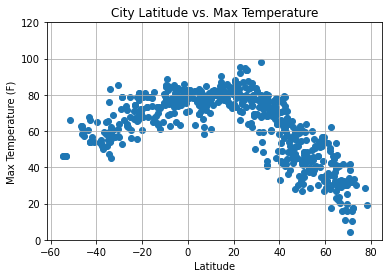

In [26]:
# Latitude vs Temp Scatter Plot
plt.scatter(city_data_clean_df['Lat'],city_data_clean_df['Max Temp'],marker="o")

# tittles and axis labels
plt.title("City Latitude vs. Max Temperature")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

plt.ylim(0,120)

# Save the figure
plt.savefig("LatitudeVsMaxTempPlot.png")

# Show plot
plt.show()




In [27]:
print("The latitude vs temperature plot indicates that the highest temperatures are near the equator (latitude = 0)")
print("It maximum temperatures drop off when you get further away from the equator, either north or south.")
print("It also indicates there are more cities in the north hemisphere.")

The latitude vs temperature plot indicates that the highest temperatures are near the equator (latitude = 0)
It maximum temperatures drop off when you get further away from the equator, either north or south.
It also indicates there are more cities in the north hemisphere.


## Latitude vs. Humidity Plot

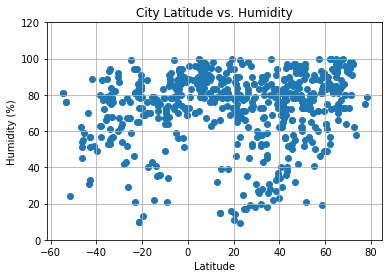

In [28]:
# Latitude vs Humidity Plot
plt.scatter(city_data_clean_df['Lat'],city_data_clean_df['Humidity'],marker="o")

# tittles and axis labels
plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

plt.ylim(0,120)

# Save the figure
plt.savefig("LatitudeVsHumidityPlot.png")

# Show plot
plt.show()

In [29]:
print("The latitude vs humidity plot indicates that there may not be much correlation between these two factors")
print("That said, the chart seems to indicate there may be slightly higher humidities in the northern hemisphere than the south....")
print("That may be due to some cities in the south hemisphere still experiencing early spring /late winter conditions, or \n it may be somewhat of an illusion given there are more cities (and more data) in the north.")

The latitude vs humidity plot indicates that there may not be much correlation between these two factors
That said, the chart seems to indicate there may be slightly higher humidities in the northern hemisphere than the south....
That may be due to some cities in the south hemisphere still experiencing early spring /late winter conditions, or 
 it may be somewhat of an illusion given there are more cities (and more data) in the north.


## Latitude vs. Cloudiness Plot

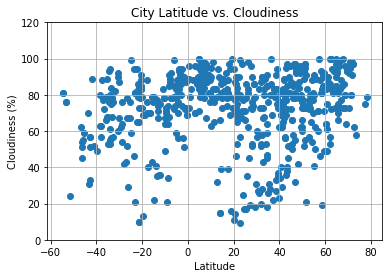

In [30]:
# Latitude vs Cloud Plot
plt.scatter(city_data_clean_df['Lat'],city_data_clean_df['Humidity'],marker="o")

# tittles and axis labels
plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

plt.ylim(0,120)

# Save the figure
plt.savefig("LatitudeVsCloudPlot.png")

# Show plot
plt.show()

In [31]:
print("As with humidity, the latitude vs cloudiness plot indicates that there may not be much correlation between these two factors")


As with humidity, the latitude vs cloudiness plot indicates that there may not be much correlation between these two factors


## Latitude vs. Wind Speed Plot

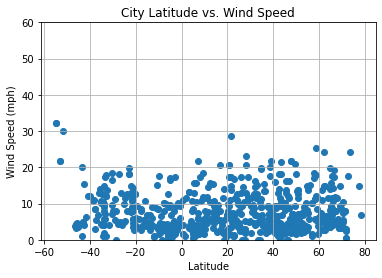

In [32]:
# Latitude vs Wind Speed Plot
plt.scatter(city_data_clean_df['Lat'],city_data_clean_df['Wind Speed'],marker="o")

# tittles and axis labels
plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

plt.ylim(0,60)

# Save the figure
plt.savefig("LatitudeVsWindPlot.png")

# Show plot
plt.show()

In [33]:
print("As with humidity and cloudiness, the latitude vs cloudiness plot indicates that there may not be much correlation\n between wind and latitude.")
print("There may be slightly higher wind points in the north, but again it is difficult to tell \ngiven the uneven distribution of cities in the two hemispheres.")

As with humidity and cloudiness, the latitude vs cloudiness plot indicates that there may not be much correlation
 between wind and latitude.
There may be slightly higher wind points in the north, but again it is difficult to tell 
given the uneven distribution of cities in the two hemispheres.


## Linear Regression

In [34]:
city_data_clean_north_df = city_data_clean_df.loc[ (city_data_clean_df["Lat"] >= 0) , :]

city_data_clean_north_df       

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Chicago,41.8500,-87.6500,79.43,67,75,1.99,US,1633821194
1,London,51.5085,-0.1257,55.15,91,53,2.30,GB,1633821217
2,Rockford,42.2711,-89.0940,79.00,57,75,9.22,US,1633821237
3,Sukkur,27.7052,68.8574,76.87,73,0,0.00,PK,1633821291
8,Hilo,19.7297,-155.0900,80.33,73,75,6.91,US,1633821039
...,...,...,...,...,...,...,...,...,...
586,Pleshanovo,52.8333,53.4833,39.47,75,15,4.74,RU,1633822150
587,Alekseyevsk,57.8406,108.3492,39.99,88,100,17.11,RU,1633822152
588,Ponta Delgada,37.7333,-25.6667,73.51,83,40,9.22,PT,1633822153
590,Alexandria,31.2156,29.9553,73.36,83,0,8.05,EG,1633821970


In [35]:
city_data_clean_south_df = city_data_clean_df.loc[ (city_data_clean_df["Lat"] < 0) , :]

city_data_clean_south_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
4,Sydney,-33.8679,151.2073,83.34,53,0,1.99,AU,1633821156
5,Jakarta,-6.2146,106.8451,85.51,85,22,0.00,ID,1633821081
6,Johannesburg,-26.2023,28.0436,62.06,29,48,4.00,ZA,1633821120
7,Lima,-12.0432,-77.0282,61.14,75,40,1.01,PE,1633821291
11,Cilegon,-6.0174,106.0538,78.69,79,4,2.10,ID,1633821326
...,...,...,...,...,...,...,...,...,...
565,Vredendal,-31.6683,18.5012,56.52,82,4,3.96,ZA,1633822121
572,Tocopilla,-22.0920,-70.1979,65.32,65,13,12.80,CL,1633822132
585,Poso,-1.3959,120.7524,79.70,72,100,4.07,ID,1633822148
589,Srandakan,-7.9386,110.2506,62.73,87,50,3.09,ID,1633822154


In [36]:
# prep series for plotting and linear regression

lat_north_values = city_data_clean_north_df ['Lat']
lat_south_values = city_data_clean_south_df ['Lat']
temp_north_values = city_data_clean_north_df ['Max Temp']
temp_south_values = city_data_clean_south_df ['Max Temp']
cloud_north_values = city_data_clean_north_df ['Cloudiness']
cloud_south_values = city_data_clean_south_df ['Cloudiness']
humid_north_values = city_data_clean_north_df ['Humidity']
humid_south_values = city_data_clean_south_df ['Humidity']
wind_north_values = city_data_clean_north_df ['Wind Speed']
wind_south_values = city_data_clean_south_df ['Wind Speed']

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared value is: 0.7023692363666229
The regression equation is: y = -0.84x +91.99


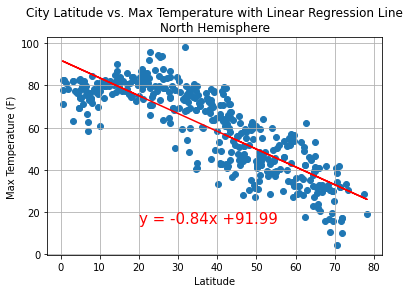

<Figure size 432x288 with 0 Axes>

In [37]:
# Latitude vs Temp Scatter Plot with regression north hemisphere

(slope, intercept, rvalue, pvalue, stderr) = linregress(lat_north_values, temp_north_values)

# Get regression values
regress_values_north = lat_north_values * slope + intercept
line_eq_north= "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.scatter(lat_north_values,temp_north_values,marker="o")
plt.plot(lat_north_values,regress_values_north,"r-")


# Label plot and annotate the line equation
plt.title("City Latitude vs. Max Temperature with Linear Regression Line\nNorth Hemisphere")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)
plt.annotate(line_eq_north,(20,15),fontsize=15,color="red") 
# I cannot get the line equation to annotate correctly.  
# per class, the () tuple specifies the lower left corner of the equation
# but after 20 minutes I still can't figure it out and don't have an hour to spend on it

# Print r value
print(f"The r-squared value is: {rvalue**2}")
print(f"The regression equation is: {line_eq_north}")
# Show plot
plt.show()
plt.tight_layout()
# Save the figure
plt.savefig("LatitudeVsMaxTempPlotWithRegrssNorth.png")



####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared value is: 0.5773189484884622
The regression equation is: y = 0.55x +80.85
The graph is showing the 
The graph is showing the 


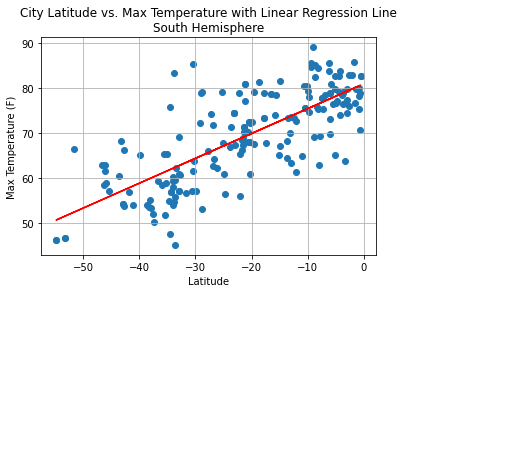

<Figure size 432x288 with 0 Axes>

In [38]:
# Latitude vs Temp Scatter Plot with regression SOUTH hemisphere

(slope, intercept, rvalue, pvalue, stderr) = linregress(lat_south_values, temp_south_values)

# Get regression values
regress_values_south = lat_south_values * slope + intercept
line_eq_south= "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.scatter(lat_south_values,temp_south_values,marker="o")
plt.plot(lat_south_values,regress_values_south,"r-")


# Label plot and annotate the line equation
plt.title("City Latitude vs. Max Temperature with Linear Regression Line\nSouth Hemisphere")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)
plt.annotate(line_eq_north,(0,0),fontsize=15,color="red") 
# I cannot get the line equation to annotate correctly.  
# per class, the () tuple specifies the lower left corner of the equation
# but after 20 minutes I still can't figure it out and don't have an hour to spend on it

# Print r value
print(f"The r-squared value is: {rvalue**2}")
print(f"The regression equation is: {line_eq_south}")
print("The graph is showing the ")
print("The graph is showing the ")
# Show plot
plt.show()
plt.tight_layout()
# Save the figure
plt.savefig("LatitudeVsMaxTempPlotWithRegrssSouth.png")

In [39]:
print("The north hemisphere has a negative correlation between temperature and latitude, while the south has a positive correlation")
print("The R squared value is roughly 0.5 for both regression equations, meaning the equations are only moderately good at\n predicting max temperature based on latitude.")

The north hemisphere has a negative correlation between temperature and latitude, while the south has a positive correlation
The R squared value is roughly 0.5 for both regression equations, meaning the equations are only moderately good at
 predicting max temperature based on latitude.


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared value is: 0.002860269676404433
The regression equation is: y = 0.05x +72.27


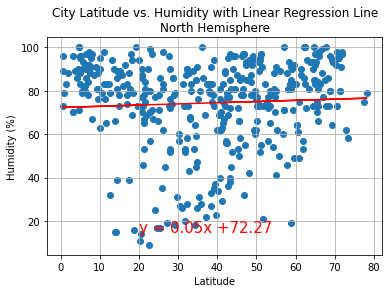

<Figure size 432x288 with 0 Axes>

In [40]:
# Humidity vs LatScatter Plot with regression north hemisphere

(slope, intercept, rvalue, pvalue, stderr) = linregress(lat_north_values, humid_north_values)

# Get regression values
regress_values_north = lat_north_values * slope + intercept
line_eq_north= "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.scatter(lat_north_values,humid_north_values,marker="o")
plt.plot(lat_north_values,regress_values_north,"r-")


# Label plot and annotate the line equation
plt.title("City Latitude vs. Humidity with Linear Regression Line\nNorth Hemisphere")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.annotate(line_eq_north,(20,15),fontsize=15,color="red") 
# I cannot get the line equation to annotate correctly.  
# per class, the () tuple specifies the lower left corner of the equation
# but after 20 minutes I still can't figure it out and don't have an hour to spend on it

# Print r value
print(f"The r-squared value is: {rvalue**2}")
print(f"The regression equation is: {line_eq_north}")
# Show plot
plt.show()
plt.tight_layout()
# Save the figure
plt.savefig("LatitudeVsHumidPlotWithRegrssNorth.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared value is: 0.049735374574228726
The regression equation is: y = 0.29x +76.36


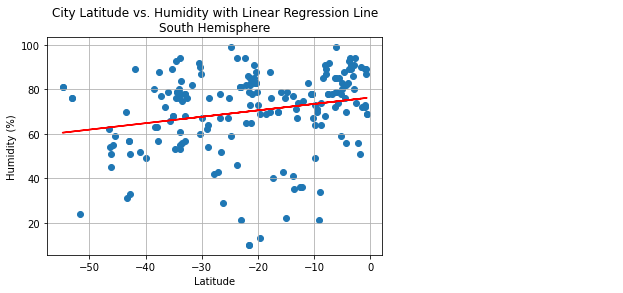

<Figure size 432x288 with 0 Axes>

In [41]:
# Humidity vs LatScatter Plot with regression SOUTH hemisphere

(slope, intercept, rvalue, pvalue, stderr) = linregress(lat_south_values, humid_south_values)

# Get regression values
regress_values_south = lat_south_values * slope + intercept
line_eq_south= "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.scatter(lat_south_values,humid_south_values,marker="o")
plt.plot(lat_south_values,regress_values_south,"r-")


# Label plot and annotate the line equation
plt.title("City Latitude vs. Humidity with Linear Regression Line\nSouth Hemisphere")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.annotate(line_eq_south,(20,15),fontsize=15,color="red") 
# I cannot get the line equation to annotate correctly.  
# per class, the () tuple specifies the lower left corner of the equation
# but after 20 minutes I still can't figure it out and don't have an hour to spend on it

# Print r value
print(f"The r-squared value is: {rvalue**2}")
print(f"The regression equation is: {line_eq_south}")
# Show plot
plt.show()
plt.tight_layout()
# Save the figure
plt.savefig("LatitudeVHumidPlotWithRegrssSouth.png")

In [42]:
print('The regression lines for both the north and south hemisphere have a slightly positive slope, indicating a\n very weak correlation between humidity and latitude.')
print("The R squared value is roughly 0 for both regression equations, meaning the equations cannot be relied on to\n predict humidity based on latitude.")

The regression lines for both the north and south hemisphere have a slightly positive slope, indicating a
 very weak correlation between humidity and latitude.
The R squared value is roughly 0 for both regression equations, meaning the equations cannot be relied on to
 predict humidity based on latitude.


####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared value is: 0.0004089467215591406
The regression equation is: y = 0.04x +58.69


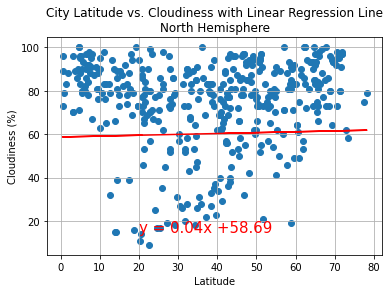

<Figure size 432x288 with 0 Axes>

In [43]:
# Cloudiness vs LatScatter Plot with regression north hemisphere

(slope, intercept, rvalue, pvalue, stderr) = linregress(lat_north_values, cloud_north_values)

# Get regression values
regress_values_north = lat_north_values * slope + intercept
line_eq_north= "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.scatter(lat_north_values,humid_north_values,marker="o")
plt.plot(lat_north_values,regress_values_north,"r-")


# Label plot and annotate the line equation
plt.title("City Latitude vs. Cloudiness with Linear Regression Line\nNorth Hemisphere")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.annotate(line_eq_north,(20,15),fontsize=15,color="red") 
# I cannot get the line equation to annotate correctly.  
# per class, the () tuple specifies the lower left corner of the equation
# but after 20 minutes I still can't figure it out and don't have an hour to spend on it

# Print r value
print(f"The r-squared value is: {rvalue**2}")
print(f"The regression equation is: {line_eq_north}")
# Show plot
plt.show()
plt.tight_layout()
# Save the figure
plt.savefig("LatitudeVsCloudPlotWithRegrssNorth.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared value is: 0.09824756287630906
The regression equation is: y = 0.83x +68.08


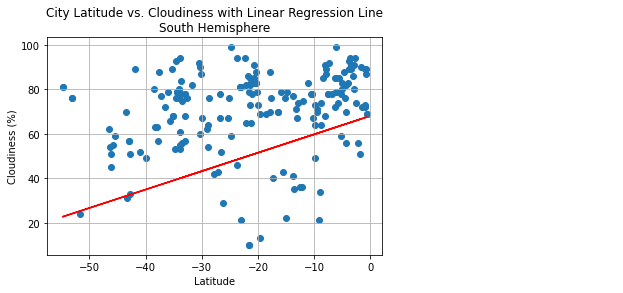

<Figure size 432x288 with 0 Axes>

In [44]:
# Cloudiness vs LatScatter Plot with regression north hemisphere

(slope, intercept, rvalue, pvalue, stderr) = linregress(lat_south_values, cloud_south_values)

# Get regression values
regress_values_south = lat_south_values * slope + intercept
line_eq_south= "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.scatter(lat_south_values,humid_south_values,marker="o")
plt.plot(lat_south_values,regress_values_south,"r-")


# Label plot and annotate the line equation
plt.title("City Latitude vs. Cloudiness with Linear Regression Line\nSouth Hemisphere")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.annotate(line_eq_south,(20,15),fontsize=15,color="red") 
# I cannot get the line equation to annotate correctly.  
# per class, the () tuple specifies the lower left corner of the equation
# but after 20 minutes I still can't figure it out and don't have an hour to spend on it

# Print r value
print(f"The r-squared value is: {rvalue**2}")
print(f"The regression equation is: {line_eq_south}")
# Show plot
plt.show()
plt.tight_layout()
# Save the figure
plt.savefig("LatitudeVsCloudPlotWithRegrssSouth.png")

In [45]:
print('The results for cloudiness are very similar to the results for humidity.')
print('The regression lines for both the north and south hemisphere have a slightly positive slope, indicating a\n very weak correlation between humidity and latitude.')
print("The R squared value is roughly 0 for both regression equations, meaning the equations cannot be relied on to\n predict cloudiness based on latitude.")

The results for cloudiness are very similar to the results for humidity.
The regression lines for both the north and south hemisphere have a slightly positive slope, indicating a
 very weak correlation between humidity and latitude.
The R squared value is roughly 0 for both regression equations, meaning the equations cannot be relied on to
 predict cloudiness based on latitude.


####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared value is: 0.003477094476705158
The regression equation is: y = 0.02x +7.25


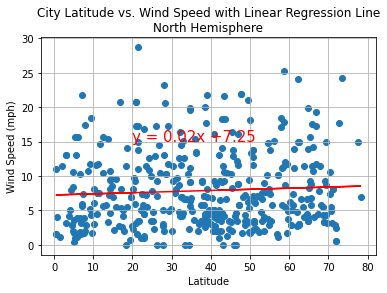

<Figure size 432x288 with 0 Axes>

In [46]:
# Wind vs LatScatter Plot with regression North hemisphere

(slope, intercept, rvalue, pvalue, stderr) = linregress(lat_north_values, wind_north_values)

# Get regression values
regress_values_north = lat_north_values * slope + intercept
line_eq_north= "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.scatter(lat_north_values,wind_north_values,marker="o")
plt.plot(lat_north_values,regress_values_north,"r-")


# Label plot and annotate the line equation
plt.title("City Latitude vs. Wind Speed with Linear Regression Line\nNorth Hemisphere")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
plt.annotate(line_eq_north,(20,15),fontsize=15,color="red") 
# I cannot get the line equation to annotate correctly.  
# per class, the () tuple specifies the lower left corner of the equation
# but after 20 minutes I still can't figure it out and don't have an hour to spend on it

# Print r value
print(f"The r-squared value is: {rvalue**2}")
print(f"The regression equation is: {line_eq_north}")
# Show plot
plt.show()
plt.tight_layout()
# Save the figure
plt.savefig("LatitudeVsWindSpeedWithRegrssNorth.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared value is: 0.14733683861971156
The regression equation is: y = -0.16x +4.6


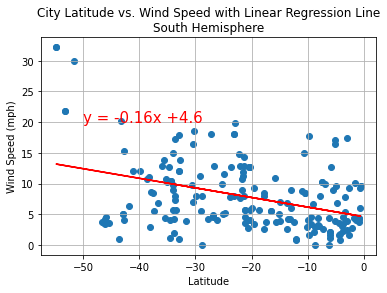

<Figure size 432x288 with 0 Axes>

In [47]:
# Wind vs LatScatter Plot with regression South hemisphere

(slope, intercept, rvalue, pvalue, stderr) = linregress(lat_south_values, wind_south_values)

# Get regression values
regress_values_south = lat_south_values * slope + intercept
line_eq_south= "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.scatter(lat_south_values,wind_south_values,marker="o")
plt.plot(lat_south_values,regress_values_south,"r-")


# Label plot and annotate the line equation
plt.title("City Latitude vs. Wind Speed with Linear Regression Line\nSouth Hemisphere")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
plt.annotate(line_eq_south,(-50,20),fontsize=15,color="red") 
# I cannot get the line equation to annotate correctly.  
# per class, the () tuple specifies the lower left corner of the equation
# but after 20 minutes I still can't figure it out and don't have an hour to spend on it

# Print r value
print(f"The r-squared value is: {rvalue**2}")
print(f"The regression equation is: {line_eq_south}")
# Show plot
plt.show()
plt.tight_layout()
# Save the figure
plt.savefig("LatitudeVsWindSpeedWithRegrssSouth.png")

In [48]:
print('The results for wind speed are very similar to the results for humidity and cloudiness.')
print('The regression lines for both the north and south hemisphere have a slightly positive slope, indicating a\n very weak correlation between humidity and latitude.')
print("The R squared value is roughly 0 for both regression equations, meaning the equations cannot be relied on to\n predict wind speed based on latitude.")

The results for wind speed are very similar to the results for humidity and cloudiness.
The regression lines for both the north and south hemisphere have a slightly positive slope, indicating a
 very weak correlation between humidity and latitude.
The R squared value is roughly 0 for both regression equations, meaning the equations cannot be relied on to
 predict wind speed based on latitude.


In [49]:
city_data_df.to_csv("city_data.csv")
city_data_clean_df.to_csv("city_data_clean.csv")
city_data_clean_north_df.to_csv("city_data_clean_north.csv")
city_data_clean_south_df.to_csv("city_data_clean_south.csv")